Imports

In [4]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 

# 1. Download the Dataset

In [5]:
!wget {"https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20220524171902_5720135f26e7b6807cab1d44_d95e3b6716b264b31770dc31b2d493f826c958f4_002_20220524181902_0027_dnld"}
os.rename("RML2016.10b.tar.bz2?Authorization=3_20220524171902_5720135f26e7b6807cab1d44_d95e3b6716b264b31770dc31b2d493f826c958f4_002_20220524181902_0027_dnld", "RML2016.10b.tar.bz2")
!tar jxf RML2016.10b.tar.bz2


--2022-05-24 17:19:45--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20220524171902_5720135f26e7b6807cab1d44_d95e3b6716b264b31770dc31b2d493f826c958f4_002_20220524181902_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2?Authorization=3_20220524171902_5720135f26e7b6807cab1d44_d95e3b6716b264b31770dc31b2d493f826c958f4_002_20220524181902_0027_dnld’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  54.9MB/s    in 22s     

2022-05-24 17:20:07 (54.6 MB/s) - ‘RML2016.10b.tar.bz2?Authorization=3_20220524171902_5720135f26e7b6807cab1d44_d95e3b6716b264b31770dc31b2d493f826c958f4_002_20220524181902_0027_dnld’ saved [1245608913/1245608913]



In [6]:
Data = pickle.load(open("RML2016.10b.dat",'rb'), encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Data.keys())))), [1,0])
print(f"Mods: {mods}")
print(f"SNRs: {snrs}")
X = []      #X is data, y is labels
y = []
for mod in mods:
    for snr in snrs:
        X.append(Data[(mod,snr)])
        for i in range(Data[(mod,snr)].shape[0]):  y.append((mod,snr))
X = np.vstack(X)
print(X.shape)
print (Data.keys())

Mods: [b'8PSK', b'AM-DSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
SNRs: [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
(1200000, 2, 128)
dict_keys([(b'QPSK', 2), (b'PAM4', 8), (b'AM-DSB', -4), (b'GFSK', 6), (b'QAM64', 8), (b'PAM4', 18), (b'QAM64', -6), (b'QAM16', 2), (b'QAM16', -20), (b'8PSK', -18), (b'PAM4', -6), (b'WBFM', -18), (b'BPSK', 8), (b'CPFSK', 10), (b'WBFM', 6), (b'BPSK', 4), (b'BPSK', -2), (b'QPSK', -20), (b'CPFSK', -8), (b'QAM64', -20), (b'QAM16', 12), (b'GFSK', -20), (b'CPFSK', 0), (b'AM-DSB', 6), (b'BPSK', -16), (b'QPSK', -6), (b'8PSK', -12), (b'CPFSK', -18), (b'AM-DSB', -18), (b'QPSK', 8), (b'PAM4', 14), (b'WBFM', -8), (b'AM-DSB', -10), (b'GFSK', 12), (b'QAM64', 2), (b'8PSK', -10), (b'QAM64', -4), (b'GFSK', -4), (b'AM-DSB', 8), (b'PAM4', -16), (b'QPSK', -16), (b'BPSK', 16), (b'WBFM', -14), (b'CPFSK', 16), (b'WBFM', 0), (b'QPSK', 6), (b'BPSK', 14), (b'AM-DSB', -8), (b'GFSK', -10), (b'CPFSK', -2), (b'Q

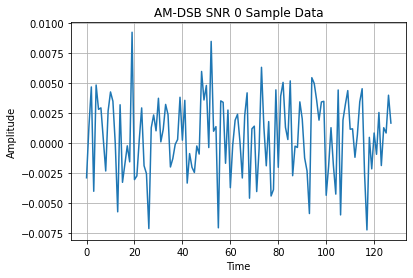

In [7]:
plt.plot(Data[b'AM-DSB',0][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("AM-DSB SNR 0 Sample Data")
plt.grid(b=True, axis='both')

# 2. Create Feature Space

In [ ]:
features_of_raw_time_series = X[:0],X[:1]
features_of_raw_time_series = np.asarray(features_of_raw_time_series)
#features_of_raw_time_series = features_of_raw_time_series.flatten()
print(features_of_raw_time_series.shape)
features_of_first_derivative_in_time =normalize(np.gradient(X[:,0], axis = 1)), normalize(np.gradient(X[:,1], axis = 1))       
features_of_first_derivative_in_time = np.asarray(features_of_first_derivative_in_time)
features_of_first_derivative_in_time= np.reshape(features_of_first_derivative_in_time,(1200000, 2, 128))
features_of_integral_in_time = integrate.cumtrapz(X, initial=0)
features_of_integral_in_time = np.asarray(features_of_integral_in_time)
Combined_features = np.concatenate((features_of_raw_time_series,features_of_first_derivative_in_time, features_of_integral_in_time),axis = None)
#for rts, fdt, it, in zip(features_of_raw_time_series, features_of_first_derivative_in_time, features_of_integral_in_time):
 # Combined_features.append(np.concatenate((rts, fdt, it), axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(2,)


In [ ]:
Combined_features = np.asarray(Combined_features)
print(features_of_first_derivative_in_time.shape)
print(features_of_integral_in_time.shape)                                 
print(Combined_features.shape)

# 3. Supervised Learning Step

I am a little confused here so I'll do both and you choose

In [ ]:
X_train_val,X_test, y_train_val, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True)
X_train, X_val,  y_train,y_val = train_test_split (X_train_val, y_train_val, test_size = 0.05, shuffle = True)

In [ ]:
#input size isvariable
#input_data = X
#input_shape = input_data[0].shape()

# 4. Big Picture

# 5. Bonus